In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df=pd.read_csv('exchange_rate.csv',parse_dates=True)
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [57]:
df.isnull().sum()

date       0
Ex_rate    0
dtype: int64

array([[<Axes: title={'center': 'Ex_rate'}>]], dtype=object)

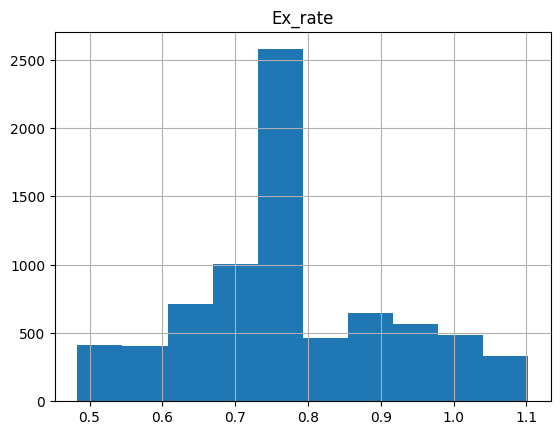

In [58]:
df.hist()

<Axes: >

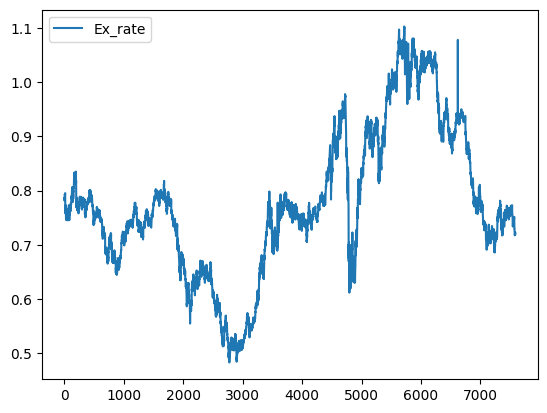

In [59]:
df.plot()

<Axes: >

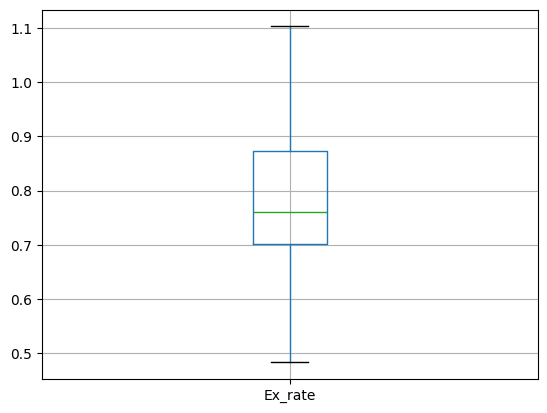

In [60]:
df.boxplot()

## Lag plot


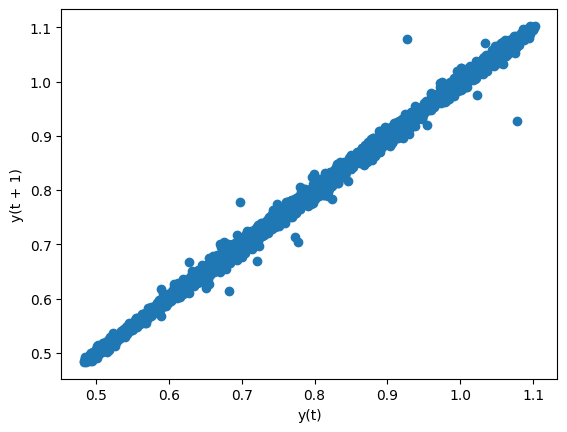

In [61]:
from pandas.plotting import lag_plot
from matplotlib import pyplot
lag_plot(df['Ex_rate'])
pyplot.show()

## Auto correlation plot

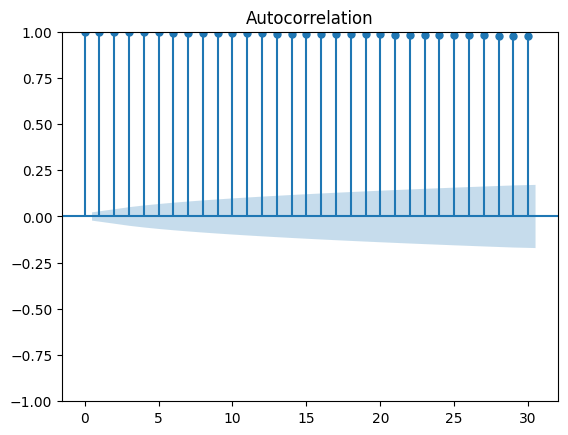

In [62]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Ex_rate'],lags=30)
plt.show()

## Resampling

In [63]:
#changing to datetime
df['date']=pd.to_datetime(df['date'],dayfirst=True)
df=df.set_index(df['date'])
df=df.drop(columns='date')

In [64]:
df

,Ex_rate
date,
1990-01-01,0.785500
1990-01-02,0.781800
1990-01-03,0.786700
1990-01-04,0.786000
1990-01-05,0.784900
...,...
2010-10-06,0.718494
2010-10-07,0.721839
2010-10-08,0.723197


In [65]:
#upsampling to months
quater_rate=df.resample('Q').mean()

In [66]:
quater_rate

,Ex_rate
date,
1990-03-31,0.764122
1990-06-30,0.792053
1990-09-30,0.785475
1990-12-31,0.774154
1991-03-31,0.783332
...,...
2009-12-31,0.719797
2010-03-31,0.746596
2010-06-30,0.755990


<Axes: xlabel='date'>

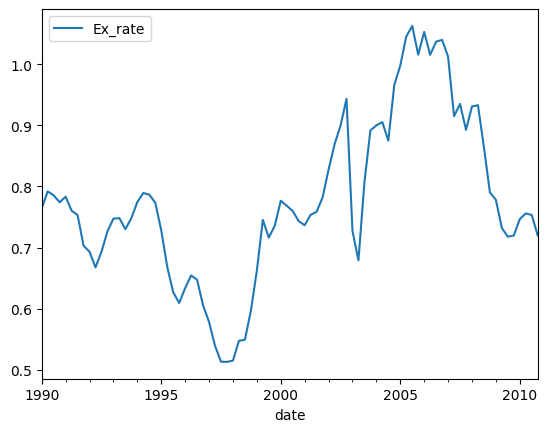

In [67]:
quater_rate.plot()

The plot shows the quarterly exchenge rates.

## Transforming data

<Axes: ylabel='Frequency'>

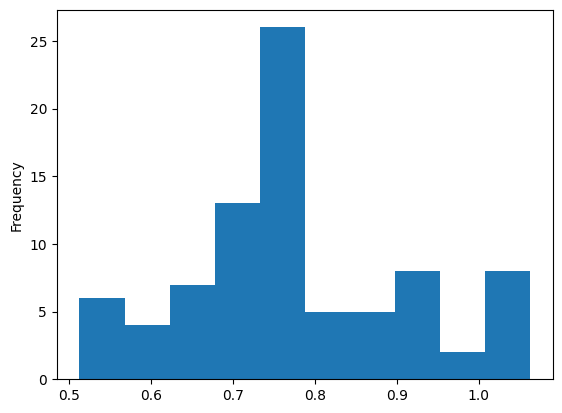

In [68]:
quater_rate['Ex_rate'].plot(kind='hist')

<Axes: ylabel='Frequency'>

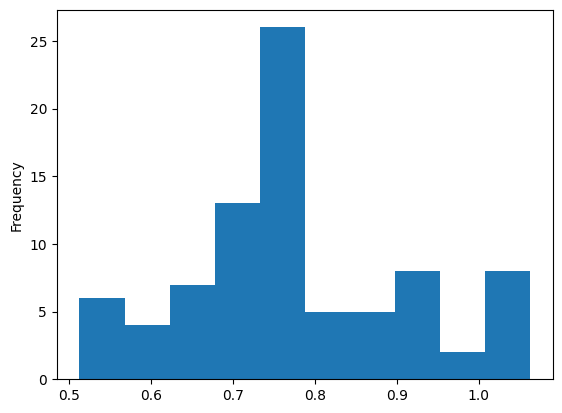

In [69]:
# sqrt transformation
import numpy as np
np.log(quater_rate['Ex_rate'])
quater_rate['Ex_rate'].plot(kind='hist')

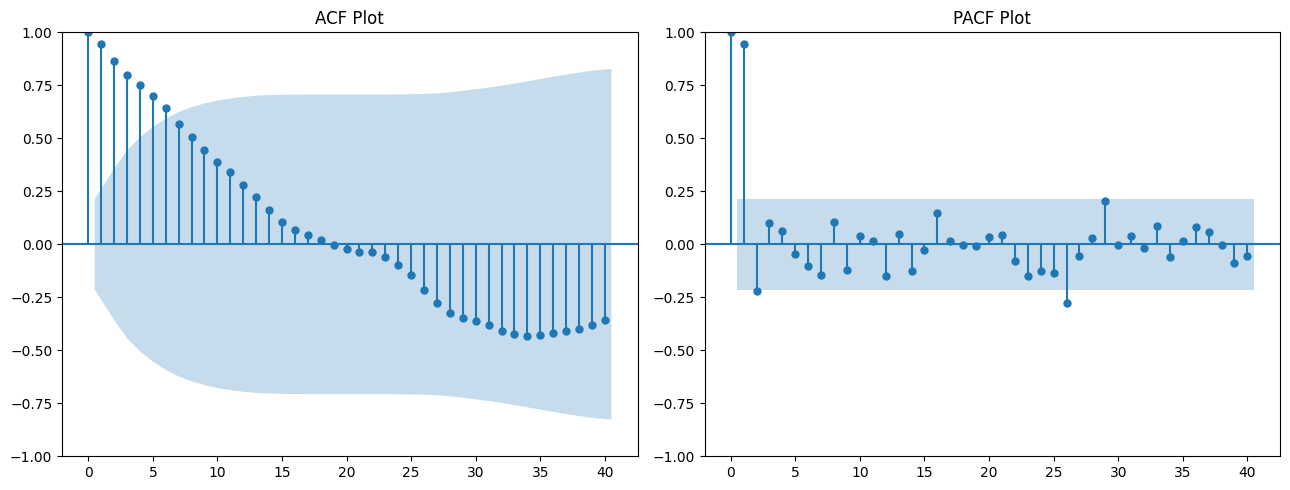

In [107]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

# ACF plot
plot_acf(quater_rate['Ex_rate'], lags=40, ax=axes[0])
axes[0].set_title('ACF Plot')

# PACF plot
plot_pacf(quater_rate['Ex_rate'], lags=40, ax=axes[1])
axes[1].set_title('PACF Plot')

plt.tight_layout()
plt.show()


## Splitting Data

In [71]:
train=quater_rate['Ex_rate'].head(63)
test=quater_rate['Ex_rate'].tail(21)

In [72]:
train.index.values.reshape(-1,1)

array([['1990-03-31T00:00:00.000000000'],
       ['1990-06-30T00:00:00.000000000'],
       ['1990-09-30T00:00:00.000000000'],
       ['1990-12-31T00:00:00.000000000'],
       ['1991-03-31T00:00:00.000000000'],
       ['1991-06-30T00:00:00.000000000'],
       ['1991-09-30T00:00:00.000000000'],
       ['1991-12-31T00:00:00.000000000'],
       ['1992-03-31T00:00:00.000000000'],
       ['1992-06-30T00:00:00.000000000'],
       ['1992-09-30T00:00:00.000000000'],
       ['1992-12-31T00:00:00.000000000'],
       ['1993-03-31T00:00:00.000000000'],
       ['1993-06-30T00:00:00.000000000'],
       ['1993-09-30T00:00:00.000000000'],
       ['1993-12-31T00:00:00.000000000'],
       ['1994-03-31T00:00:00.000000000'],
       ['1994-06-30T00:00:00.000000000'],
       ['1994-09-30T00:00:00.000000000'],
       ['1994-12-31T00:00:00.000000000'],
       ['1995-03-31T00:00:00.000000000'],
       ['1995-06-30T00:00:00.000000000'],
       ['1995-09-30T00:00:00.000000000'],
       ['1995-12-31T00:00:00.00000

## Arima model

In [75]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')
stepwise_fit=auto_arima(quater_rate['Ex_rate'],start_P=1,start_q=1
                        ,max_P=3,max_p=3,m=12,start_p=0,seasonal=True,
                        d=None,D=1,trace=True,error_action='ignore',
                        suppress_warnings=True,stepwise=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=1.63 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-46.906, Time=0.06 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-202.088, Time=1.11 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-48.763, Time=0.06 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-180.236, Time=0.16 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=-205.954, Time=1.44 sec
 ARIMA(1,0,0)(3,1,0)[12] intercept   : AIC=-210.052, Time=6.28 sec
 ARIMA(1,0,0)(3,1,1)[12] intercept   : AIC=inf, Time=3.03 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=2.72 sec
 ARIMA(0,0,0)(3,1,0)[12] intercept   : AIC=inf, Time=1.77 sec
 ARIMA(2,0,0)(3,1,0)[12] intercept   : AIC=-209.279, Time=4.38 sec
 ARIMA(1,0,1)(3,1,0)[12] intercept   : AIC=-209.537, Time=3.59 sec
 ARIMA(0,0,1)(3,1,0)[12] intercept   : AIC=-158.584, Time=2.86 sec
 ARIMA(2,0,1)(3,1,0)[12] intercept   : AIC=-20

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   84
Model:             SARIMAX(1, 0, 0)x(3, 1, 0, 12)   Log Likelihood                 110.935
Date:                            Wed, 06 Nov 2024   AIC                           -211.870
Time:                                    16:33:43   BIC                           -200.487
Sample:                                03-31-1990   HQIC                          -207.338
                                     - 12-31-2010                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9510      0.038     24.862      0.000       0.876       1.026
ar.S.L12      -0.8141      0.132     -6.183      0.000      -1.072      -0.556
ar.S.L24      -0.5710      0.194     -2.937      0.003      -0.952      -0.190
ar.S.L36      -0.3553      0.195     -1.824      0.068      -0.737       0.027
sigma2         0.0023      0.000      8.253      0.000       0.002       0.003
===================================================================================
Ljung-Box (L1) (Q):                   1.20   Jarque-Bera (JB):                88.07
Prob(Q):                              0.27   Prob(JB):                         0.00
Heteroskedasticity (H):               1.95   Skew:                            -0.90
Prob(H) (two-sided):                  0.11   Kurtosis:                         8.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

from the best model values the sarima model is being created 

In [79]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(quater_rate['Ex_rate'],
              order=(1,0,0),
              seasonal_order=(3,1,0,12))
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            Ex_rate   No. Observations:                   84
Model:             SARIMAX(1, 0, 0)x(3, 1, 0, 12)   Log Likelihood                 110.935
Date:                            Wed, 06 Nov 2024   AIC                           -211.870
Time:                                    16:37:34   BIC                           -200.487
Sample:                                03-31-1990   HQIC                          -207.338
                                     - 12-31-2010                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9510      0.038     24.862      0.000       0.876       1.026
ar.S.L12      -0.8141      0.132     -6.183      0.000      -1.072      -0.556
ar.S.L24      -0.5710      0.194     -2.937      0.003      -0.952      -0.190
ar.S.L36      -0.3553      0.195     -1.824      0.068      -0.737       0.027
sigma2         0.0023      0.000      8.253      0.000       0.002       0.003
===================================================================================
Ljung-Box (L1) (Q):                   1.20   Jarque-Bera (JB):                88.07
Prob(Q):                              0.27   Prob(JB):                         0.00
Heteroskedasticity (H):               1.95   Skew:                            -0.90
Prob(H) (two-sided):                  0.11   Kurtosis:                         8.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [82]:
test

date
2005-12-31    1.015733
2006-03-31    1.052942
2006-06-30    1.015500
2006-09-30    1.037002
2006-12-31    1.039907
2007-03-31    1.012343
2007-06-30    0.915078
2007-09-30    0.935029
2007-12-31    0.892593
2008-03-31    0.930971
2008-06-30    0.932993
2008-09-30    0.864080
2008-12-31    0.790304
2009-03-31    0.778145
2009-06-30    0.732088
2009-09-30    0.717756
2009-12-31    0.719797
2010-03-31    0.746596
2010-06-30    0.755990
2010-09-30    0.753354
2010-12-31    0.719946
Freq: QE-DEC, Name: Ex_rate, dtype: float64

<Axes: xlabel='date'>

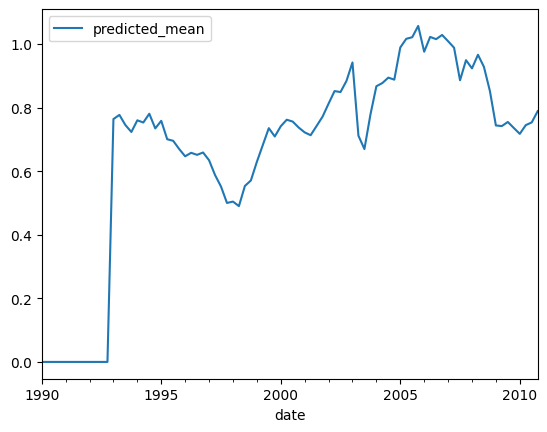

In [101]:
start=len(train)
end=len(train)+len(test)-1
predictions = result.get_prediction(start=0, end=len(quater_rate['Ex_rate']) - 1).predicted_mean
# Plotting Predictions
predictions.plot(legend=True)


These are the future predictions 

In [102]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

print(rmse(quater_rate['Ex_rate'],predictions))
mean_squared_error(quater_rate['Ex_rate'],predictions)

0.28427808544797156


0.08081402986596423

These are the error values of the model